Zaimportujmy co trzeba: 

In [1]:
%matplotlib notebook
from skimage import io, filters, morphology, measure, feature, exposure, color
from skimage.color.adapt_rgb import adapt_rgb, each_channel
from matplotlib import pyplot as plt

Pobierzmy obrazki i zapiszmy je

In [2]:
samoloty_url = [
    "http://www.cs.put.poznan.pl/wjaskowski/pub/teaching/kck/labs/planes/samolot00.jpg",
    "http://www.cs.put.poznan.pl/wjaskowski/pub/teaching/kck/labs/planes/samolot01.jpg",
    "http://www.cs.put.poznan.pl/wjaskowski/pub/teaching/kck/labs/planes/samolot02.jpg",
    "http://www.cs.put.poznan.pl/wjaskowski/pub/teaching/kck/labs/planes/samolot03.jpg",
    "http://www.cs.put.poznan.pl/wjaskowski/pub/teaching/kck/labs/planes/samolot05.jpg",
    "http://www.cs.put.poznan.pl/wjaskowski/pub/teaching/kck/labs/planes/samolot07.jpg",
    "http://www.cs.put.poznan.pl/wjaskowski/pub/teaching/kck/labs/planes/samolot08.jpg",
    "http://www.cs.put.poznan.pl/wjaskowski/pub/teaching/kck/labs/planes/samolot09.jpg",
    "http://www.cs.put.poznan.pl/wjaskowski/pub/teaching/kck/labs/planes/samolot10.jpg",
    "http://www.cs.put.poznan.pl/wjaskowski/pub/teaching/kck/labs/planes/samolot11.jpg",
    "http://www.cs.put.poznan.pl/wjaskowski/pub/teaching/kck/labs/planes/samolot12.jpg",
    "http://www.cs.put.poznan.pl/wjaskowski/pub/teaching/kck/labs/planes/samolot13.jpg",
    "http://www.cs.put.poznan.pl/wjaskowski/pub/teaching/kck/labs/planes/samolot14.jpg",
    "http://www.cs.put.poznan.pl/wjaskowski/pub/teaching/kck/labs/planes/samolot15.jpg",
    "http://www.cs.put.poznan.pl/wjaskowski/pub/teaching/kck/labs/planes/samolot16.jpg",
    "http://www.cs.put.poznan.pl/wjaskowski/pub/teaching/kck/labs/planes/samolot17.jpg",
    "http://www.cs.put.poznan.pl/wjaskowski/pub/teaching/kck/labs/planes/samolot19.jpg",
    "http://www.cs.put.poznan.pl/wjaskowski/pub/teaching/kck/labs/planes/samolot20.jpg"
]

samoloty_rgb = []
samoloty_grayscale = []

for samolot in samoloty_url:
    samimg = io.imread(samolot)
    samoloty_rgb.append(samimg)
    samoloty_grayscale.append(color.rgb2gray(samimg))

Użyjmy funkcji logarytmicznej do wzmocnienia czerni, dokonajmy threshold, nałóżmy filtr Canny'ego i znormalizujmy go (wartości dobrane eksperymentalnie)

In [3]:
samoloty_detected = []
for samolot in samoloty_grayscale:
    samolot_sigmoid = exposure.adjust_log(samolot, 0.5)
    thres = filters.threshold_yen(samolot_sigmoid)
    samolot_thres = samolot >= thres
    samolot_canny = feature.canny(samolot_thres, sigma=3.2)
    samoloty_detected.append(morphology.binary_closing(samolot_canny, morphology.square(5)))

Znajdujemy kontury

<IPython.core.display.Javascript object>


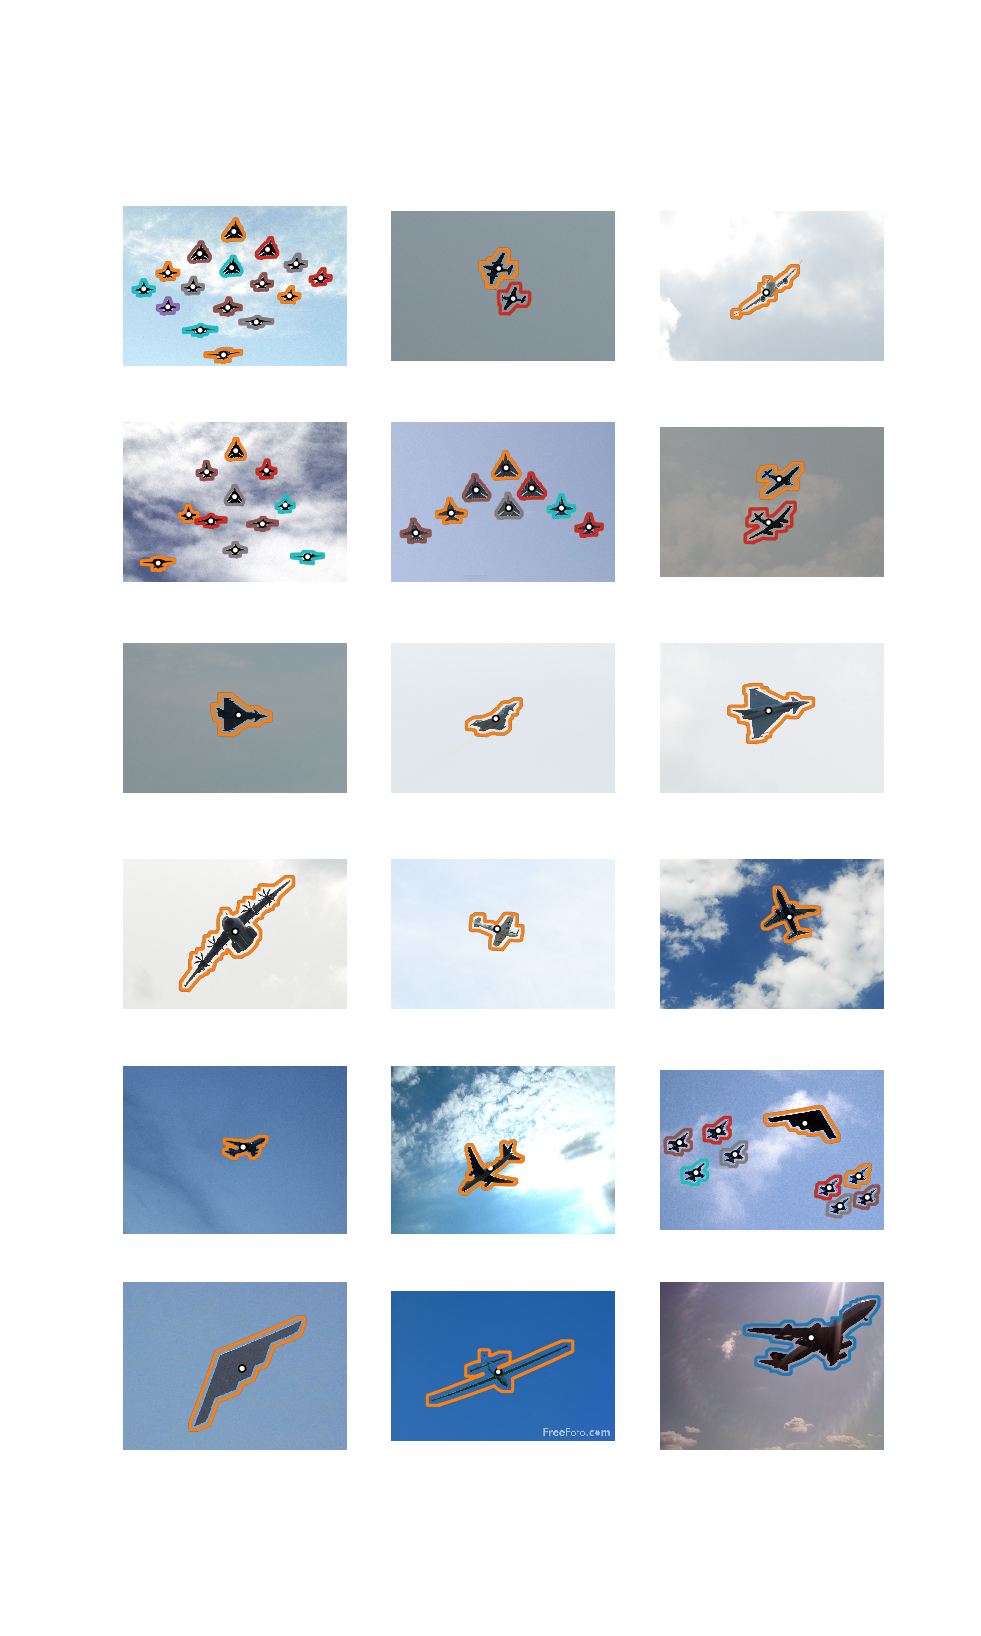

In [9]:
fig, axes = plt.subplots(6,3, figsize=(9,15))
for i in range(0, 18):
    ax = axes[int(i/3), i%3]
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis("off")
    ax.imshow(samoloty_rgb[i])
    cont = measure.find_contours(samoloty_detected[i], 0.9, fully_connected='high')
    for n, contour in enumerate(cont):
        #For some reason canny filter creates bounding box around whole image, we're getting rid of it here
        if(contour[:, 0].max() - contour[:, 0].min() > samoloty_rgb[i].shape[0]*0.9):
            continue
            
        #centroid calculation
        centroid = (contour[:, 1].mean(), contour[:, 0].mean())
        #set its radius relative to image size
        circle = plt.Circle(centroid, samoloty_rgb[i].shape[0]*0.02, facecolor='white', edgecolor='black')
        
        #draw contour
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
        #draw centroid
        ax.add_artist(circle)